In [2]:
import numpy as np
import numpy.ma as ma
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
import sqlite3
from sqlalchemy import create_engine

plt.rcParams["figure.figsize"] = (3,3)

print (time.ctime())

Wed Sep 23 13:10:00 2020


In [3]:
# file1 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_visEq_1s_W0028_F03-200228-095644-1.csv"
file1 ="/QuantumRouter/8x8-20200316T165613Z-001/8x8Grid_blnkext_viseq_10s_W0057_H07-200306-101040-1-003.csv"
print (file1, time.ctime())

# data1=np.loadtxt(file1, dtype= float, delimiter=",", usecols = (0,1,2,3,4))
# data1 = np.genfromtxt(file1, delimiter=",", skip_header=True)[:, 1:]
# data1 = pd.read_csv(file1)
print(pd.read_csv(file1, nrows=2))
# csv_database = create_engine('sqlite:///csv_database.db')
# create connection to db and create it by refencing db that dosen't exist
# connection = sqlite3.connect('AOM_database.db')
# create cursor to allow us to interact/modify db
# cursor = connection.cursor()

GridX1min = 20
GridX1max = 65
GridY1min = 200
GridY1max = 245
chunk_size = 10000
# i = 0
# j = 0

# for df in pd.read_csv(file1, chunksize=chunk_size, iterator=True):
#     df = df.rename(columns = {c: c.replace(' ','') for c in df.columns})
#     df.index += j
    
#     df.to_sql('data_use', csv_database, if_exists = 'append')
#     j = df.index[-1]+1
    
#     print('| index: {}'.format(j))
    
# df =    

# I want to read in the file in chunks and manipulate in chunks
# First impose the boundary conditions on each chunck
# Then combine chunks into one df
def min_max(data, grid_x_min, grid_x_max, grid_y_min, grid_y_max):
    """Returns DataFrame filtering values less than min or greater than max for two columns"""
    x_cond = (data['#Row'] <grid_x_min) | (data['#Row'] > grid_x_max)
#     GridX1maxvals = (chunk.Col > GridX1max)
    y_cond = (data['#Col'] < grid_y_min) | (data['#Col'] > grid_y_max)
#     GridY1maxvals = (chunk.Row > GridY1max)
    data_chunk = data.drop(data[x_cond | y_cond].index)
    return data_chunk

file1_chunks = [min_max(chunk, GridX1min, GridX1max, GridY1min, GridY1max) for chunk in pd.read_csv(file1, chunksize=chunk_size)]

grid_df1 = pd.concat(file1_chunks) # concat accepts list of df's w/common col lengths and stacks them vertically
print(grid_df1.shape, type(grid_df1.iloc[0,0]), type(grid_df1.iloc[1,1]), time.ctime())
print(grid_df1.iloc[:3])    

#print data
# y1   = data1.iloc[:, 0].values
# x1   = data1.iloc[:, 1].values
# t1   = data1.iloc[:, 2].values
# a1   = data1.iloc[:, 3].values
# A1   = data1.iloc[:, 4].values

# for i in range(0,20):
#     print (i, x1[i],y1[i],t1[i],a1[i],A1[i])
    
# print (len(t1), type(t1), time.ctime())

# file2 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_SettingsEq_1s_W0028_F03-200228-100050-1.csv"
file2 = "/QuantumRouter/8x8-20200316T165613Z-001/8x8Grid_SettingsEq_10s_W0028_F03-200228-100025-1.csv"
print (file2, time.ctime())

# data2=np.loadtxt(file2, dtype= float, delimiter=",", usecols = (0,1,2,3,4))
# data2 = np.genfromtxt(file2, delimiter=",", skip_header=True)[:, 1:]
# data2 =pd.read_csv(file2)

print(pd.read_csv(file2, nrows=2))

GridX2min = 60
GridX2max = 105
GridY2min = 155
GridY2max = 198

file2_chunks = [min_max(chunk, GridX2min, GridX2max, GridY2min, GridY2max) for chunk in pd.read_csv(file2, chunksize=chunk_size)]
 
grid_df2 = pd.concat(file2_chunks) # concat accepts list of df's w/common col lengths and stacks them vertically
print(grid_df2.shape, type(grid_df2.iloc[0,0]), type(grid_df2.iloc[1,1]), time.ctime())
print(grid_df2.iloc[:3])

# #print data
# y2  = data2.iloc[:, 0].values
# x2  = data2.iloc[:, 1].values
# t2  = data2.iloc[:, 2].values
# a2  = data2.iloc[:, 3].values
# A2  = data2.iloc[:, 4].values

# # Grid_x1 = data1.loc[]

# for i in range(0,20):
#     print (i, x2[i],y2[i],t2[i],a2[i],A2[i])
    
# print (len(t2), type(t2), time.ctime())

/QuantumRouter/8x8-20200316T165613Z-001/8x8Grid_blnkext_viseq_10s_W0057_H07-200306-101040-1-003.csv Wed Sep 23 13:10:00 2020
   #Col  #Row         #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
0   225    45  16700489984       1275            2475         NaN
1   226    45  16700486144       1200            2475         NaN
(121887161, 6) <class 'numpy.int64'> <class 'numpy.int64'> Wed Sep 23 13:16:34 2020
   #Col  #Row         #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
0   225    45  16700489984       1275            2475         NaN
1   226    45  16700486144       1200            2475         NaN
2   226    43  16700486144       1025            1025         NaN
/QuantumRouter/8x8-20200316T165613Z-001/8x8Grid_SettingsEq_10s_W0028_F03-200228-100025-1.csv Wed Sep 23 13:16:35 2020
   #Col  #Row         #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
0   145     0  16585124864         25              25         NaN
1   145     0  16585340672        250             250         NaN
(55873701, 6)

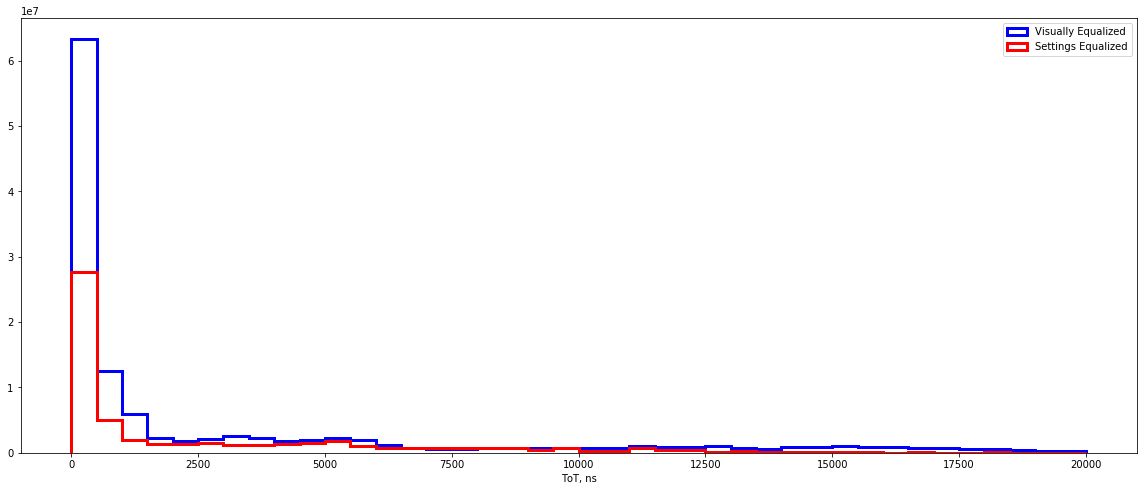

In [4]:
fig, ax1 = plt.subplots(ncols=1, figsize=(20, 8))

nbins = 40

plt.hist(grid_df1['#ToT[arb]'], bins= nbins, range = [0, 20000], lw=3, histtype='step', label = 'Visually Equalized', color = 'blue')
plt.hist(grid_df2['#ToT[arb]'], bins= nbins, range = [0, 20000], lw=3, histtype='step', label = 'Settings Equalized', color = 'red')

plt.xlabel('ToT, ns')
plt.legend()
plt.show()

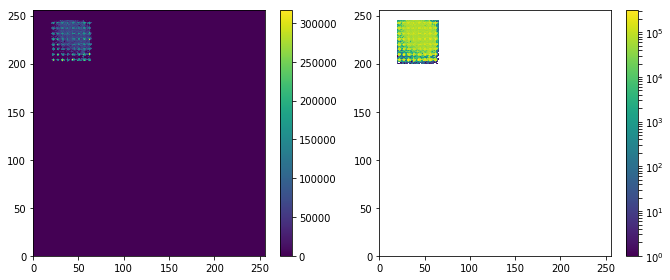

In [5]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()

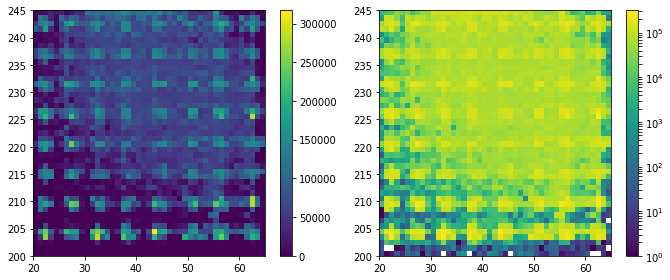

In [6]:
# GridX1min = 77
# GridX1max = 122
# GridY1min = 153
# GridY1max = 198

# GridX1min = 60
# GridX1max = 105
# GridY1min = 155
# GridY1max = 198

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

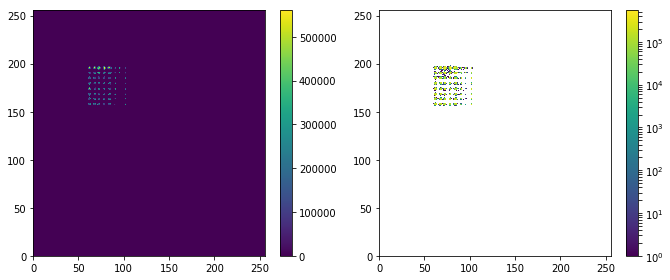

In [7]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(grid_df2['#Row'], grid_df2['#Col'], bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(grid_df2['#Row'], grid_df2['#Col'], bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()

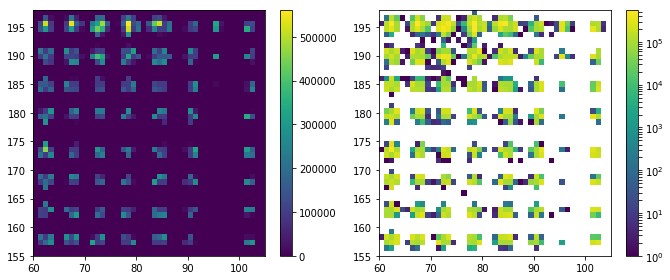

In [8]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(grid_df2['#Row'], grid_df2['#Col'], bins = GridX2max-GridX2min, range = [(GridX2min, GridX2max), (GridY2min, GridY2max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(grid_df2['#Row'], grid_df2['#Col'], bins = GridX2max-GridX2min, range = [(GridX2min, GridX2max), (GridY2min, GridY2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

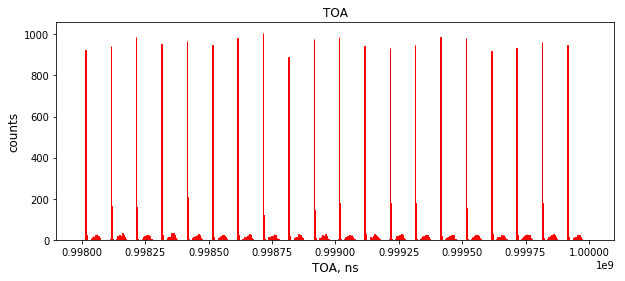

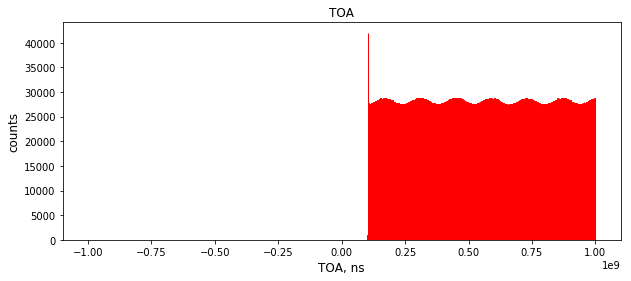

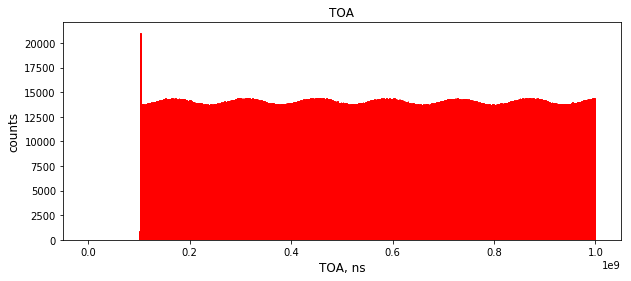

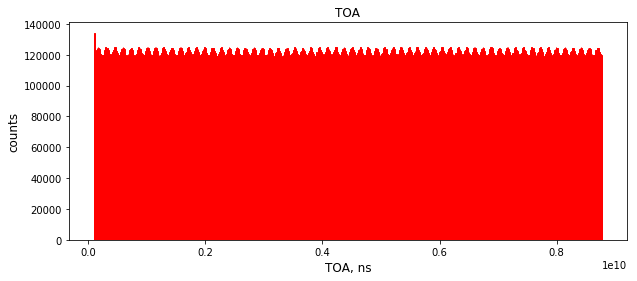

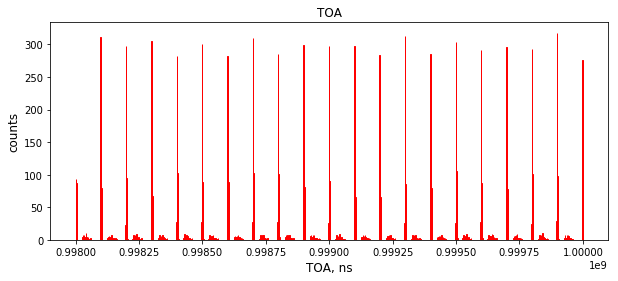

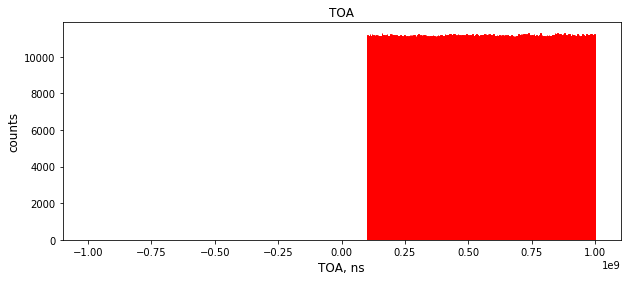

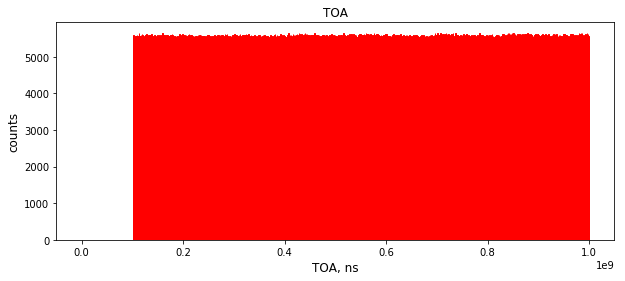

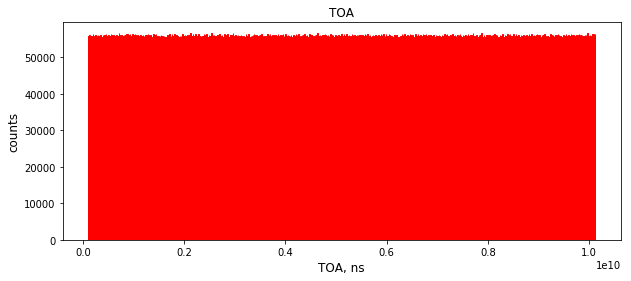

In [10]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(grid_df1['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

#fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(tt/4096.*25., bins = 100, color = 'r', ec = 'k')
#plt.title("TOA", fontsize = 12) # change the title
#plt.xlabel('TOA, ns',fontsize = 12)
#plt.ylabel('counts',fontsize = 12)
#plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
plt.hist(grid_df1['#ToA']/4096.*25., bins = 1000, range = (-1.E+9, 1.E+9), color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
plt.hist(grid_df1['#ToA']/4096.*25., bins = 1000, range = (0, 1.E+9), color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
plt.hist(grid_df1['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(grid_df2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

#fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(tt/4096.*25., bins = 100, color = 'r', ec = 'k')
#plt.title("TOA", fontsize = 12) # change the title
#plt.xlabel('TOA, ns',fontsize = 12)
#plt.ylabel('counts',fontsize = 12)
#plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
plt.hist(grid_df2['#ToA']/4096.*25., bins = 1000, range = (-1.E+9, 1.E+9), color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
plt.hist(grid_df2['#ToA']/4096.*25., bins = 1000, range = (0, 1.E+9), color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
plt.hist(grid_df2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

Text(0,0.5,'counts')

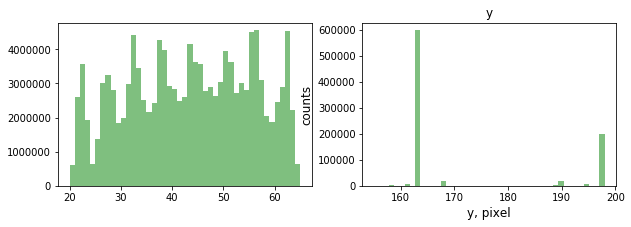

In [9]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 3))

ax0.hist(grid_df1['#Row'], bins = GridX1max-GridX1min, range = (GridX1min, GridX1max), color = 'g', alpha=0.5, histtype = 'stepfilled')
plt.title("x", fontsize = 12) # change the title
plt.xlabel('x, pixel',fontsize = 12)
plt.ylabel('counts',fontsize = 12)

ax1.hist(grid_df1['#Col'], bins = GridY1max-GridY1min, range = (155, 198), color = 'g', alpha=0.5, histtype = 'stepfilled')
plt.title("y", fontsize = 12) # change the title
plt.xlabel('y, pixel',fontsize = 12)
plt.ylabel('counts',fontsize = 12)

Text(0,0.5,'counts')

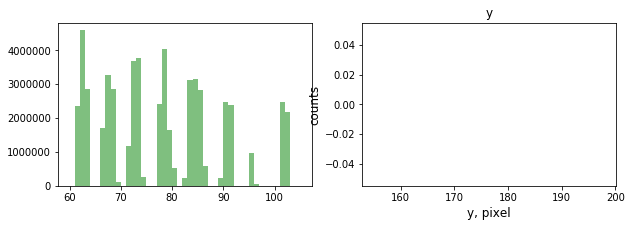

In [10]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 3))

ax0.hist(grid_df2['#Row'], bins = GridX2max-GridX2min, range = (GridX2min, GridX2max), color = 'g', alpha=0.5, histtype = 'stepfilled')
plt.title("x", fontsize = 12) # change the title
plt.xlabel('x, pixel',fontsize = 12)
plt.ylabel('counts',fontsize = 12)

ax1.hist(grid_df2['#Row'], bins = GridY2max-GridY2min, range = (155, 198), color = 'g', alpha=0.5, histtype = 'stepfilled')
plt.title("y", fontsize = 12) # change the title
plt.xlabel('y, pixel',fontsize = 12)
plt.ylabel('counts',fontsize = 12)

In [11]:
# GridX1min = 20
# GridX1max = 65
# GridY1min = 200
# GridY1max = 245

# GridX2min = 60
# GridX2max = 105
# GridY2min = 155
# GridY2max = 198

# # #Sort arrays to exclude points outside Grid


# # #Initialize trash arrays
# # Grid_x1trash = []
# # Grid_y1trash = []
# # Grid_t1trash = []
# # Grid_a1trash = []
# # Grid_A1trash = []

# # #Sort out points NOT in 8x8 Grid, add to trash
# # for i in range(len(x1)):
# #     if (GridY1min > y1[i]):
# #         x1.drop(i)
# #         y1.drop(i)
# #         t1.drop(i)
# #         a1.drop(i)
# #         A1.v(i)
# #     elif (GridY1max < y1[i]):
# #         x1.drop(i)
# #         y1.drop(i)
# #         t1.drop(i)
# #         a1.drop(i)
# #         A1.drop(i)
# #     elif (GridX1min > x1[i]):
# #         x1.drop(i)
# #         y1.drop(i)
# #         t1.drop(i)
# #         a1.drop(i)
# #         A1.drop(i)
# #     elif (GridX1max < x1[i]):
# #         x1.drop(i)
# #         y1.drop(i)
# #         t1.drop(i)
# #         a1.drop(i)
# #         A1.drop(i)

# # #Generate new arrays by deleting trash selections from next step up   
# # Grid_x1 = x1
# # Grid_y1 = y1
# # Grid_t1 = t1
# # Grid_a1 = a1
# # Grid_A1 = A1

# #Initialize trash arrays
# # Grid_x1trash = []
# # Grid_y1trash = []
# # Grid_t1trash = []
# # Grid_a1trash = []
# # Grid_A1trash = []

# #Sort out points NOT in 8x8 Grid, add to trash
# for i in range(len(x1)):
#     if (y1[i] < GridY1min):
#         Grid_x1 = np.delete(x1, i)
# #         Grid_y1 = np.delete(y1, i)
# #         Grid_t1 = np.delete(t1, i)
# #         Grid_a1 = np.delete(a1, i)
# #         Grid_A1 = np.delete(A1, i)
#     elif (y1[i] > GridY1max):
#         Grid_x1 = np.delete(x1, i)
# #         Grid_y1 = np.delete(y1, i)
# #         Grid_t1 = np.delete(t1, i)
# #         Grid_a1 = np.delete(a1, i)
# #         Grid_A1 = np.delete(A1, i)
#     if (x1[i] < GridX1min):
#         Grid_x1 = np.delete(x1, i)
# #         Grid_y1 = np.delete(y1, i)
# #         Grid_t1 = np.delete(t1, i)
# #         Grid_a1 = np.delete(a1, i)
# #         Grid_A1 = np.delete(A1, i)
#     elif (x1[i] > GridX1max):
#         Grid_x1 = np.delete(x1, i)
# #         Grid_y1 = np.delete(y1, i)
# #         Grid_t1 = np.delete(t1, i)
# #         Grid_a1 = np.delete(a1, i)
# #         Grid_A1 = np.delete(A1, i)

# #Col	#Row	#ToA	#ToT[arb]	#ToTtotal[arb]	#Centroid

# Grid_x1=[]
# Grid_x1.append(data1.loc[data1['#Col'] < GridY1min, ['#Col']])
# Grid_x1.append()
# Grid_x1_ymax = data1.loc[data1['#Col'] > GridY1max, ['#Col']]
# Grid_x1_xmin
# Grid_x1_xmax

#Generate new arrays by deleting trash selections from next step up
# print (len(x1), len(Grid_x1), len(Grid_y1))
# Grid_x1 = np.delete(x1, Grid_x1trash)
# Grid_y1 = np.delete(y1, Grid_y1trash)
# Grid_t1 = np.delete(t1, Grid_t1trash)
# Grid_a1 = np.delete(a1, Grid_a1trash)
# Grid_A1 = np.delete(A1, Grid_a1trash)

#Initialize trash arrays
# Grid_x1trash = []
# Grid_y1trash = []
# Grid_t1trash = []
# Grid_a1trash = []
# Grid_A1trash = []

#Sort out points NOT in 8x8 Grid, add to trash
# Grid_x1 = ma.masked_array(x1, mask =((x1 < GridX1min) | (x1 > GridX1max)))
# Grid_y1 = ma.masked_array(y1, mask =((y1 < GridY1min) | (y1 > GridY1max)))
# Grid_t1 = ma.masked_array(t1, mask =(((x1 < GridX1min) | (x1 > GridX1max)) & ((y1 < GridY1min) | (y1 > GridY1max))))
# Grid_a1 = ma.masked_array(a1, mask =(((x1 < GridX1min) | (x1 > GridX1max)) & ((y1 < GridY1min) | (y1 > GridY1max))))
# Grid_A1 = ma.masked_array(A1, mask =(((x1 < GridX1min) | (x1 > GridX1max)) & ((y1 < GridY1min) | (y1 > GridY1max))))

#test for masking
# import numpy as np
# import numpy.ma as ma
# GridX1min = 3
# GridX1max = 8
# GridY1min = 5
# GridY1max = 7
# x1 = np.array([1,1,2,3,5,6,7,8,9,10])
# y1 = np.array([1,2,3,4,5,6,8,9,10,10])
# t1 = np.array([1,1,1,1,3,4,5,8,9,8])
# a1 = np.array([3,4,5,7,8,6,6,8,9,9])
# A1 = np.array([3,5,6,1,2,5,8,1,9,9])
# print('Len(x1,y1,t1,a1,A1) = ', len(x1),',', len(y1),',', len(t1),',', len(a1),',', len(A1))
# Grid_x1 = ma.masked_array(x1, mask =((x1 < GridX1min) | (x1 > GridX1max)))
# Grid_y1 = ma.masked_array(y1, mask =((y1 < GridY1min) | (y1 > GridY1max)))
# print('Grid_x1 = ', Grid_x1)
# print('len() = ', len(Grid_x1))
# print('Grid_x1[0] = ',Grid_x1[0])
# print('Grid_x1[0] type = ', type(Grid_x1[0]))
# print('Grid_y1 = ', Grid_y1)
# print('len() = ', len(Grid_y1))
# Grid_t1 = ma.masked_array(t1, mask =(((x1 < GridX1min) | (x1 > GridX1max)) & ((y1 < GridY1min) | (y1 > GridY1max))))
# Grid_a1 = ma.masked_array(a1, mask =(((x1 < GridX1min) | (x1 > GridX1max)) & ((y1 < GridY1min) | (y1 > GridY1max))))
# Grid_A1 = ma.masked_array(A1, mask =(((x1 < GridX1min) | (x1 > GridX1max)) & ((y1 < GridY1min) | (y1 > GridY1max))))
# print('Grid_t1 = ', Grid_t1)
# print('len() = ', len(Grid_t1))
# print('Grid_a1 = ', Grid_a1)
# print('len() = ', len(Grid_a1))
# print('Grid_A1 = ', Grid_A1)
# print('len() = ', len(Grid_A1))



# for i in range(len(x1)):
#     if (GridY1min > y1[i])[:
#         Grid_x1trash.append(i)
#         Grid_y1trash.append(i)
#         Grid_t1trash.append(i)
#         Grid_a1trash.append(i)
#         Grid_A1trash.append(i)
#     elif (GridY1max < y1[i]):
#         Grid_x1trash.append(i)
#         Grid_y1trash.append(i)
#         Grid_t1trash.append(i)
#         Grid_a1trash.append(i)
#         Grid_A1trash.append(i)
#     elif (GridX1min > x1[i]):
#         Grid_x1trash.append(i)
#         Grid_y1trash.append(i)
#         Grid_t1trash.append(i)
#         Grid_a1trash.append(i)
#         Grid_A1trash.append(i)
#     elif (GridX1max < x1[i]):
#         Grid_x1trash.append(i)
#         Grid_y1trash.append(i)
#         Grid_t1trash.append(i)
#         Grid_a1trash.append(i)
#         Grid_A1trash.append(i)

#Generate new arrays by deleting trash selections from next step up
# print (len(x1), len(Grid_x1trash))
# Grid_x1 = np.delete(x1, Grid_x1trash)
# Grid_y1 = np.delete(y1, Grid_y1trash)
# Grid_t1 = np.delete(t1, Grid_t1trash)
# Grid_a1 = np.delete(a1, Grid_a1trash)
# Grid_A1 = np.delete(A1, Grid_a1trash)

#Initialize trash arrays
# Grid_x1trash = []
# Grid_y1trash = []
# Grid_t1trash = []
# Grid_a1trash = []
# Grid_A1trash = []

#Sort out points NOT in 8x8 Grid, add to trash
# for i in range(len(x1)):
#     if (GridY1min > y1[i]):
#         Grid_x1trash.append(i)
#         Grid_y1trash.append(i)
#         Grid_t1trash.append(i)
#         Grid_a1trash.append(i)
#         Grid_A1trash.append(i)
#     elif (GridY1max < y1[i]):
#         Grid_x1trash.append(i)
#         Grid_y1trash.append(i)
#         Grid_t1trash.append(i)
#         Grid_a1trash.append(i)
#         Grid_A1trash.append(i)
#     elif (GridX1min > x1[i]):
#         Grid_x1trash.append(i)
#         Grid_y1trash.append(i)
#         Grid_t1trash.append(i)
#         Grid_a1trash.append(i)
#         Grid_A1trash.append(i)
#     elif (GridX1max < x1[i]):
#         Grid_x1trash.append(i)
#         Grid_y1trash.append(i)
#         Grid_t1trash.append(i)
#         Grid_a1trash.append(i)
#         Grid_A1trash.append(i)

#Generate new arrays by deleting trash selections from next step up
# print (len(x1), len(Grid_x1trash))
# Grid_x1 = np.delete(x1, Grid_x1trash)
# Grid_y1 = np.delete(y1, Grid_y1trash)
# Grid_t1 = np.delete(t1, Grid_t1trash)
# Grid_a1 = np.delete(a1, Grid_a1trash)
# Grid_A1 = np.delete(A1, Grid_a1trash)


#Sanity Check
# print (len(x1), len(Grid_x1trash), len(Grid_x1))

In [12]:
#Define column segregations

C1min = GridX1min; C1max = C1min + 5;
C2min = C1max + 1; C2max = C2min + 4;
C3min = C2max + 1; C3max = C3min + 4;
C4min = C3max + 1; C4max = C4min + 5;
C5min = C4max + 1; C5max = C5min + 5;
C6min = C5max + 1; C6max = C6min + 5;
C7min = C6max + 1; C7max = C7min + 5;
C8min = C7max + 1; C8max = C8min + 5;

#Define Row segregations

R1min = GridY1min; R1max = R1min + 5;
R2min = R1max + 1; R2max = R2min + 4;
R3min = R2max + 1; R3max = R3min + 4;
R4min = R3max + 1; R4max = R4min + 5;
R5min = R4max + 1; R5max = R5min + 5;
R6min = R5max + 1; R6max = R6min + 5;
R7min = R6max + 1; R7max = R7min + 4;
R8min = R7max + 1; R8max = R8min + 5;

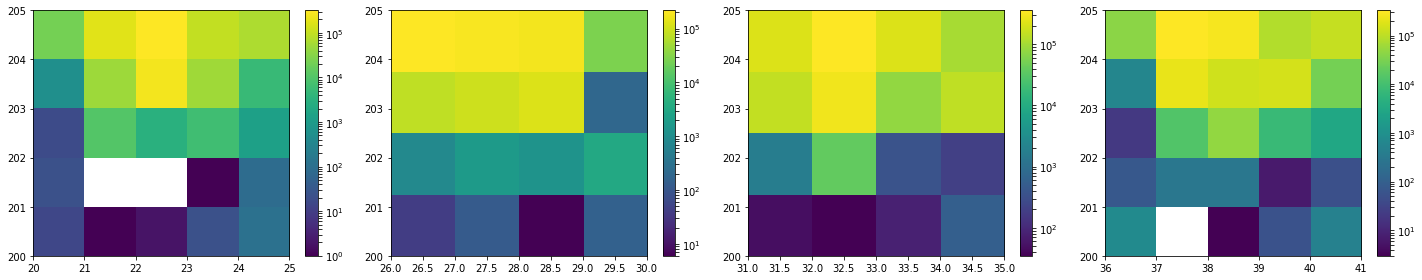

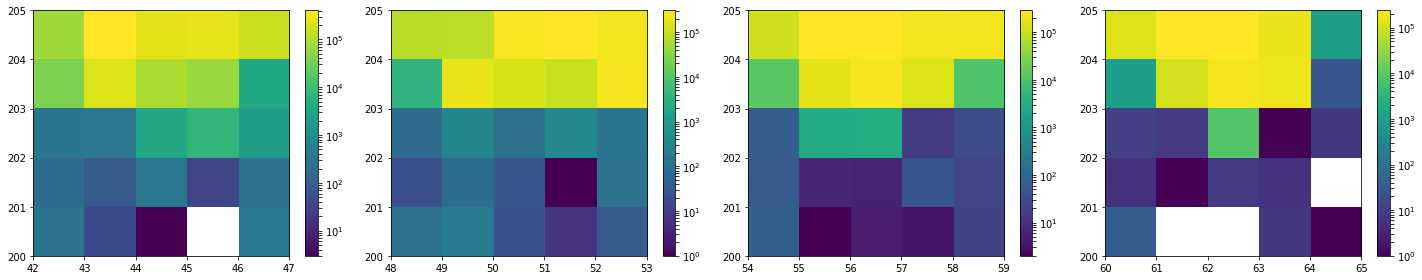

In [13]:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

In [14]:
row1_df = grid_df1.drop(grid_df1[(grid_df1['#Col'] > R1min) & (grid_df1["#Col"] < R1max)].index)

print(row1_df.shape, type(row1_df.iloc[0,0]), type(row1_df.iloc[1,1]), time.ctime())
print(row1_df.iloc[:3])

(124499888, 6) <class 'numpy.int64'> <class 'numpy.int64'> Tue Jul  7 10:37:55 2020
   #Col  #Row         #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
0   225    45  16700489984       1275            2475         NaN
1   226    45  16700486144       1200            2475         NaN
2   226    43  16700486144       1025            1025         NaN


In [ ]:
C1R1_df = row1_df.drop(row1_df[(row1_df['#Col'] > C1min) & (row1_df["#Col"] < C1max)].index)

print(C1R1_df.shape, type(C1R1_df.iloc[0,0]), type(C1R1_df.iloc[1,1]), time.ctime())
print(C1R1_df.iloc[:3])
rate_C1R1 = len(C1R1_df.index)
print ('Point 1 Rate (Hz):', rate_C1R1)

C2R1_df = row1_df.drop(row1_df[(row1_df['#Col'] > C2min) & (row1_df["#Col"] < C2max)].index)

print(C2R1_df.shape, type(C2R1_df.iloc[0,0]), type(C2R1_df.iloc[1,1]), time.ctime())
print(C2R1_df.iloc[:3])
rate_C2R1 = len(C2R1_df.index)
print ('Point 2 Rate (Hz):', rate_C2R1)

C3R1_df = row1_df.drop(row1_df[(row1_df['#Col'] > C3min) & (row1_df["#Col"] < C3max)].index)

print(C3R1_df.shape, type(C3R1_df.iloc[0,0]), type(C3R1_df.iloc[1,1]), time.ctime())
print(C3R1_df.iloc[:3])
rate_C3R1 = len(C3R1_df.index)
print ('Point 3 Rate (Hz):', rate_C3R1)

C4R1_df = row1_df.drop(row1_df[(row1_df['#Col'] > C4min) & (row1_df["#Col"] < C4max)].index)

print(C4R1_df.shape, type(C4R1_df.iloc[0,0]), type(C4R1_df.iloc[1,1]), time.ctime())
print(C4R1_df.iloc[:3])
rate_C4R1 = len(C4R1_df.index)
print ('Point 4 Rate (Hz):', rate_C4R1)

C5R1_df = row1_df.drop(row1_df[(row1_df['#Col'] > C5min) & (row1_df["#Col"] < C5max)].index)

print(C5R1_df.shape, type(C5R1_df.iloc[0,0]), type(C5R1_df.iloc[1,1]), time.ctime())
print(C5R1_df.iloc[:3])
rate_C5R1 = len(C5R1_df.index)
print ('Point 5 Rate (Hz):', rate_C5R1)

C6R1_df = row1_df.drop(row1_df[(row1_df['#Col'] > C6min) & (row1_df["#Col"] < C6max)].index)

print(C6R1_df.shape, type(C6R1_df.iloc[0,0]), type(C6R1_df.iloc[1,1]), time.ctime())
print(C6R1_df.iloc[:3])
rate_C6R1 = len(C6R1_df.index)
print ('Point 6 Rate (Hz):', rate_C6R1)

C7R1_df = row1_df.drop(row1_df[(row1_df['#Col'] > C7min) & (row1_df["#Col"] < C7max)].index)

print(C7R1_df.shape, type(C7R1_df.iloc[0,0]), type(C7R1_df.iloc[1,1]), time.ctime())
print(C7R1_df.iloc[:3])
rate_C7R1 = len(C7R1_df.index)
print ('Point 7 Rate (Hz):', rate_C7R1)

C8R1_df = row1_df.drop(row1_df[(row1_df['#Col'] > C8min) & (row1_df["#Col"] < C8max)].index)

print(C8R1_df.shape, type(C8R1_df.iloc[0,0]), type(C8R1_df.iloc[1,1]), time.ctime())
print(C8R1_df.iloc[:3])
rate_C8R1 = len(C8R1_df.index)
print ('Point 8 Rate (Hz):', rate_C8R1)

In [ ]:
#Display Row 2

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

In [ ]:
row2_df = grid_df1.drop(grid_df1[(grid_df1['#Col'] > R2min) & (grid_df1["#Col"] < R2max)].index)

print(row2_df.shape, type(row2_df.iloc[0,0]), type(row2_df.iloc[1,1]), time.ctime())
print(row2_df.iloc[:3])

In [ ]:
C1R2_df = row2_df.drop(row2_df[(row2_df['#Col'] > C1min) & (row2_df["#Col"] < C1max)].index)

print(C1R2_df.shape, type(C1R2_df.iloc[0,0]), type(C1R2_df.iloc[1,1]), time.ctime())
print(C1R2_df.iloc[:3])
rate_C1R2 = len(C1R2_df.index)
print ('Point 1 Rate (Hz):', rate_C1R2)

C2R2_df = row2_df.drop(row2_df[(row2_df['#Col'] > C2min) & (row2_df["#Col"] < C2max)].index)

print(C2R2_df.shape, type(C2R2_df.iloc[0,0]), type(C2R2_df.iloc[1,1]), time.ctime())
print(C2R2_df.iloc[:3])
rate_C2R2 = len(C2R2_df.index)
print ('Point 2 Rate (Hz):', rate_C2R2)

C3R2_df = row2_df.drop(row2_df[(row2_df['#Col'] > C3min) & (row2_df["#Col"] < C3max)].index)

print(C3R2_df.shape, type(C3R2_df.iloc[0,0]), type(C3R2_df.iloc[1,1]), time.ctime())
print(C3R2_df.iloc[:3])
rate_C3R2 = len(C3R2_df.index)
print ('Point 3 Rate (Hz):', rate_C3R2)

C4R2_df = row2_df.drop(row2_df[(row2_df['#Col'] > C4min) & (row2_df["#Col"] < C4max)].index)

print(C4R2_df.shape, type(C4R2_df.iloc[0,0]), type(C4R2_df.iloc[1,1]), time.ctime())
print(C4R2_df.iloc[:3])
rate_C4R2 = len(C4R2_df.index)
print ('Point 4 Rate (Hz):', rate_C4R2)

C5R2_df = row2_df.drop(row2_df[(row2_df['#Col'] > C5min) & (row2_df["#Col"] < C5max)].index)

print(C5R2_df.shape, type(C5R2_df.iloc[0,0]), type(C5R2_df.iloc[1,1]), time.ctime())
print(C5R2_df.iloc[:3])
rate_C5R2 = len(C5R2_df.index)
print ('Point 5 Rate (Hz):', rate_C5R2)

C6R2_df = row2_df.drop(row2_df[(row2_df['#Col'] > C6min) & (row2_df["#Col"] < C6max)].index)

print(C6R2_df.shape, type(C6R2_df.iloc[0,0]), type(C6R2_df.iloc[1,1]), time.ctime())
print(C6R2_df.iloc[:3])
rate_C6R2 = len(C6R2_df.index)
print ('Point 6 Rate (Hz):', rate_C6R2)

C7R2_df = row2_df.drop(row2_df[(row2_df['#Col'] > C7min) & (row2_df["#Col"] < C7max)].index)

print(C7R2_df.shape, type(C7R2_df.iloc[0,0]), type(C7R2_df.iloc[1,1]), time.ctime())
print(C7R2_df.iloc[:3])
rate_C7R2 = len(C7R2_df.index)
print ('Point 7 Rate (Hz):', rate_C7R2)

C8R2_df = row2_df.drop(row2_df[(row2_df['#Col'] > C8min) & (row2_df["#Col"] < C8max)].index)

print(C8R2_df.shape, type(C8R2_df.iloc[0,0]), type(C8R2_df.iloc[1,1]), time.ctime())
print(C8R2_df.iloc[:3])
rate_C8R2 = len(C8R2_df.index)
print ('Point 8 Rate (Hz):', rate_C8R2)

In [ ]:
#Display Row 3

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

In [ ]:
row3_df = grid_df1.drop(grid_df1[(grid_df1['#Col'] > R3min) & (grid_df1["#Col"] < R3max)].index)

print(row3_df.shape, type(row3_df.iloc[0,0]), type(row3_df.iloc[1,1]), time.ctime())
print(row3_df.iloc[:3])

In [ ]:
C1R3_df = row3_df.drop(row3_df[(row3_df['#Col'] > C1min) & (row3_df["#Col"] < C1max)].index)

print(C1R3_df.shape, type(C1R3_df.iloc[0,0]), type(C1R3_df.iloc[1,1]), time.ctime())
print(C1R3_df.iloc[:3])
rate_C1R3 = len(C1R3_df.index)
print ('Point 1 Rate (Hz):', rate_C1R3)

C2R3_df = row3_df.drop(row3_df[(row3_df['#Col'] > C2min) & (row3_df["#Col"] < C2max)].index)

print(C2R3_df.shape, type(C2R3_df.iloc[0,0]), type(C2R3_df.iloc[1,1]), time.ctime())
print(C2R3_df.iloc[:3])
rate_C2R3 = len(C2R3_df.index)
print ('Point 2 Rate (Hz):', rate_C2R3)

C3R3_df = row3_df.drop(row3_df[(row3_df['#Col'] > C3min) & (row3_df["#Col"] < C3max)].index)

print(C3R3_df.shape, type(C3R3_df.iloc[0,0]), type(C3R3_df.iloc[1,1]), time.ctime())
print(C3R3_df.iloc[:3])
rate_C3R3 = len(C3R3_df.index)
print ('Point 3 Rate (Hz):', rate_C3R3)

C4R3_df = row3_df.drop(row3_df[(row3_df['#Col'] > C4min) & (row3_df["#Col"] < C4max)].index)

print(C4R3_df.shape, type(C4R3_df.iloc[0,0]), type(C4R3_df.iloc[1,1]), time.ctime())
print(C4R3_df.iloc[:3])
rate_C4R3 = len(C4R3_df.index)
print ('Point 4 Rate (Hz):', rate_C4R3)

C5R3_df = row3_df.drop(row3_df[(row3_df['#Col'] > C5min) & (row3_df["#Col"] < C5max)].index)

print(C5R3_df.shape, type(C5R3_df.iloc[0,0]), type(C5R3_df.iloc[1,1]), time.ctime())
print(C5R3_df.iloc[:3])
rate_C5R3 = len(C5R3_df.index)
print ('Point 5 Rate (Hz):', rate_C5R3)

C6R3_df = row3_df.drop(row3_df[(row3_df['#Col'] > C6min) & (row3_df["#Col"] < C6max)].index)

print(C6R3_df.shape, type(C6R3_df.iloc[0,0]), type(C6R3_df.iloc[1,1]), time.ctime())
print(C6R3_df.iloc[:3])
rate_C6R3 = len(C6R3_df.index)
print ('Point 6 Rate (Hz):', rate_C6R3)

C7R3_df = row3_df.drop(row3_df[(row3_df['#Col'] > C7min) & (row3_df["#Col"] < C7max)].index)

print(C7R3_df.shape, type(C7R3_df.iloc[0,0]), type(C7R3_df.iloc[1,1]), time.ctime())
print(C7R3_df.iloc[:3]
rate_C7R3 = len(C7R3_df.index)
print ('Point 7 Rate (Hz):', rate_C7R3)

C8R3_df = row3_df.drop(row3_df[(row3_df['#Col'] > C8min) & (row3_df["#Col"] < C8max)].index)

print(C8R3_df.shape, type(C8R3_df.iloc[0,0]), type(C8R3_df.iloc[1,1]), time.ctime())
print(C8R3_df.iloc[:3])
rate_C8R3 = len(C8R3_df.index)
print ('Point 8 Rate (Hz):', rate_C8R3)

In [ ]:
#Display Row 4

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

In [ ]:
row4_df = grid_df1.drop(grid_df1[(grid_df1['#Col'] > R4min) & (grid_df1["#Col"] < R4max)].index)

print(row4_df.shape, type(row4_df.iloc[0,0]), type(row4_df.iloc[1,1]), time.ctime())
print(row4_df.iloc[:3])

In [ ]:
C1R4_df = row4_df.drop(row4_df[(row4_df['#Col'] > C1min) & (row4_df["#Col"] < C1max)].index)

print(C1R4_df.shape, type(C1R4_df.iloc[0,0]), type(C1R4_df.iloc[1,1]), time.ctime())
print(C1R4_df.iloc[:3])
rate_C1R4 = len(C1R4_df.index)
print ('Point 1 Rate (Hz):', rate_C1R4)

C2R4_df = row4_df.drop(row4_df[(row4_df['#Col'] > C2min) & (row4_df["#Col"] < C2max)].index)

print(C2R4_df.shape, type(C2R4_df.iloc[0,0]), type(C2R4_df.iloc[1,1]), time.ctime())
print(C2R4_df.iloc[:3])
rate_C2R4 = len(C2R4_df.index)
print ('Point 2 Rate (Hz):', rate_C2R4)

C3R4_df = row4_df.drop(row4_df[(row4_df['#Col'] > C3min) & (row4_df["#Col"] < C3max)].index)

print(C3R4_df.shape, type(C3R4_df.iloc[0,0]), type(C3R4_df.iloc[1,1]), time.ctime())
print(C3R4_df.iloc[:3])
rate_C3R4 = len(C3R4_df.index)
print ('Point 3 Rate (Hz):', rate_C3R4)

C4R4_df = row4_df.drop(row4_df[(row4_df['#Col'] > C4min) & (row4_df["#Col"] < C4max)].index)

print(C4R4_df.shape, type(C4R4_df.iloc[0,0]), type(C4R4_df.iloc[1,1]), time.ctime())
print(C4R4_df.iloc[:3])
rate_C4R4 = len(C4R4_df.index)
print ('Point 4 Rate (Hz):', rate_C4R4)

C5R4_df = row4_df.drop(row4_df[(row4_df['#Col'] > C5min) & (row4_df["#Col"] < C5max)].index)

print(C5R4_df.shape, type(C5R4_df.iloc[0,0]), type(C5R4_df.iloc[1,1]), time.ctime())
print(C5R4_df.iloc[:3])
rate_C5R4 = len(C5R4_df.index)
print ('Point 5 Rate (Hz):', rate_C5R4)

C6R4_df = row4_df.drop(row4_df[(row4_df['#Col'] > C6min) & (row4_df["#Col"] < C6max)].index)

print(C6R4_df.shape, type(C6R4_df.iloc[0,0]), type(C6R4_df.iloc[1,1]), time.ctime())
print(C6R4_df.iloc[:3])
rate_C6R4 = len(C6R4_df.index)
print ('Point 6 Rate (Hz):', rate_C6R4)

C7R4_df = row4_df.drop(row4_df[(row4_df['#Col'] > C7min) & (row4_df["#Col"] < C7max)].index)

print(C7R4_df.shape, type(C7R4_df.iloc[0,0]), type(C7R4_df.iloc[1,1]), time.ctime())
print(C7R4_df.iloc[:3])
rate_C7R4 = len(C7R4_df.index)
print ('Point 7 Rate (Hz):', rate_C7R4)

C8R4_df = row4_df.drop(row4_df[(row4_df['#Col'] > C8min) & (row4_df["#Col"] < C8max)].index)

print(C8R4_df.shape, type(C8R4_df.iloc[0,0]), type(C8R4_df.iloc[1,1]), time.ctime())
print(C8R4_df.iloc[:3])
rate_C8R4 = len(C8R4_df.index)
print ('Point 8 Rate (Hz):', rate_C8R4)

In [ ]:
#Display Row 5

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

In [ ]:
row5_df = grid_df1.drop(grid_df1[(grid_df1['#Col'] > R5min) & (grid_df1["#Col"] < R5max)].index)

print(row5_df.shape, type(row5_df.iloc[0,0]), type(row5_df.iloc[1,1]), time.ctime())
print(row5_df.iloc[:3])

In [ ]:
C1R5_df = row5_df.drop(row5_df[(row5_df['#Col'] > C1min) & (row5_df["#Col"] < C1max)].index)

print(C1R5_df.shape, type(C1R5_df.iloc[0,0]), type(C1R5_df.iloc[1,1]), time.ctime())
print(C1R5_df.iloc[:3])
rate_C1R5 = len(C1R5_df.index)
print ('Point 1 Rate (Hz):', rate_C1R5)

C2R5_df = row5_df.drop(row5_df[(row5_df['#Col'] > C2min) & (row5_df["#Col"] < C2max)].index)

print(C2R5_df.shape, type(C2R5_df.iloc[0,0]), type(C2R5_df.iloc[1,1]), time.ctime())
print(C2R5_df.iloc[:3])
rate_C2R5 = len(C2R5_df.index)
print ('Point 2 Rate (Hz):', rate_C2R5)

C3R5_df = row5_df.drop(row5_df[(row5_df['#Col'] > C3min) & (row5_df["#Col"] < C3max)].index)

print(C3R5_df.shape, type(C3R5_df.iloc[0,0]), type(C3R5_df.iloc[1,1]), time.ctime())
print(C3R5_df.iloc[:3])
rate_C3R5 = len(C3R5_df.index)
print ('Point 3 Rate (Hz):', rate_C3R5)

C4R5_df = row5_df.drop(row5_df[(row5_df['#Col'] > C4min) & (row5_df["#Col"] < C4max)].index)

print(C4R5_df.shape, type(C4R5_df.iloc[0,0]), type(C4R5_df.iloc[1,1]), time.ctime())
print(C4R5_df.iloc[:3])
rate_C4R5 = len(C4R5_df.index)
print ('Point 4 Rate (Hz):', rate_C4R5)

C5R5_df = row5_df.drop(row5_df[(row5_df['#Col'] > C5min) & (row5_df["#Col"] < C5max)].index)

print(C5R5_df.shape, type(C5R5_df.iloc[0,0]), type(C5R5_df.iloc[1,1]), time.ctime())
print(C5R5_df.iloc[:3])
rate_C5R5 = len(C5R5_df.index)
print ('Point 5 Rate (Hz):', rate_C5R5)

C6R5_df = row5_df.drop(row5_df[(row5_df['#Col'] > C6min) & (row5_df["#Col"] < C6max)].index)

print(C6R5_df.shape, type(C6R5_df.iloc[0,0]), type(C6R5_df.iloc[1,1]), time.ctime())
print(C6R5_df.iloc[:3])
rate_C6R5 = len(C6R5_df.index)
print ('Point 6 Rate (Hz):', rate_C6R5)

C7R5_df = row5_df.drop(row5_df[(row5_df['#Col'] > C7min) & (row5_df["#Col"] < C7max)].index)

print(C7R5_df.shape, type(C7R5_df.iloc[0,0]), type(C7R5_df.iloc[1,1]), time.ctime())
print(C7R5_df.iloc[:3])
rate_C7R5 = len(C7R5_df.index)
print ('Point 7 Rate (Hz):', rate_C7R5)

C8R5_df = row5_df.drop(row5_df[(row5_df['#Col'] > C8min) & (row5_df["#Col"] < C8max)].index)

print(C8R5_df.shape, type(C8R5_df.iloc[0,0]), type(C8R5_df.iloc[1,1]), time.ctime())
print(C8R5_df.iloc[:3])
rate_C8R5 = len(C8R5_df.index)
print ('Point 8 Rate (Hz):', rate_C8R5)

In [ ]:
#Display Row 6

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

In [ ]:
row6_df = grid_df1.drop(grid_df1[(grid_df1['#Col'] > R6min) & (grid_df1["#Col"] < R6max)].index)

print(row6_df.shape, type(row6_df.iloc[0,0]), type(row6_df.iloc[1,1]), time.ctime())
print(row6_df.iloc[:3])

In [ ]:
C1R6_df = row6_df.drop(row6_df[(row6_df['#Col'] > C1min) & (row6_df["#Col"] < C1max)].index)

print(C1R6_df.shape, type(C1R6_df.iloc[0,0]), type(C1R6_df.iloc[1,1]), time.ctime())
print(C1R6_df.iloc[:3])
rate_C1R6 = len(C1R6_df.index)
print ('Point 1 Rate (Hz):', rate_C1R6)

C2R6_df = row6_df.drop(row6_df[(row6_df['#Col'] > C2min) & (row6_df["#Col"] < C2max)].index)

print(C2R6_df.shape, type(C2R6_df.iloc[0,0]), type(C2R6_df.iloc[1,1]), time.ctime())
print(C2R6_df.iloc[:3])
rate_C2R6 = len(C2R6_df.index)
print ('Point 2 Rate (Hz):', rate_C2R6)

C3R6_df = row6_df.drop(row6_df[(row6_df['#Col'] > C3min) & (row6_df["#Col"] < C3max)].index)

print(C3R6_df.shape, type(C3R6_df.iloc[0,0]), type(C3R6_df.iloc[1,1]), time.ctime())
print(C3R6_df.iloc[:3])
rate_C3R6 = len(C3R6_df.index)
print ('Point 3 Rate (Hz):', rate_C3R6)

C4R6_df = row6_df.drop(row6_df[(row6_df['#Col'] > C4min) & (row6_df["#Col"] < C4max)].index)

print(C4R6_df.shape, type(C4R6_df.iloc[0,0]), type(C4R6_df.iloc[1,1]), time.ctime())
print(C4R6_df.iloc[:3])
rate_C4R6 = len(C4R6_df.index)
print ('Point 4 Rate (Hz):', rate_C4R6)

C5R6_df = row6_df.drop(row6_df[(row6_df['#Col'] > C5min) & (row6_df["#Col"] < C5max)].index)

print(C5R6_df.shape, type(C5R6_df.iloc[0,0]), type(C5R6_df.iloc[1,1]), time.ctime())
print(C5R6_df.iloc[:3])
rate_C5R6 = len(C5R6_df.index)
print ('Point 5 Rate (Hz):', rate_C5R6)

C6R6_df = row6_df.drop(row6_df[(row6_df['#Col'] > C6min) & (row6_df["#Col"] < C6max)].index)

print(C6R6_df.shape, type(C6R6_df.iloc[0,0]), type(C6R6_df.iloc[1,1]), time.ctime())
print(C6R6_df.iloc[:3])
rate_C6R6 = len(C6R6_df.index)
print ('Point 6 Rate (Hz):', rate_C6R6)

C7R6_df = row6_df.drop(row6_df[(row6_df['#Col'] > C7min) & (row6_df["#Col"] < C7max)].index)

print(C7R6_df.shape, type(C7R6_df.iloc[0,0]), type(C7R6_df.iloc[1,1]), time.ctime())
print(C7R6_df.iloc[:3])
rate_C7R6 = len(C7R6_df.index)
print ('Point 7 Rate (Hz):', rate_C7R6)

C8R6_df = row6_df.drop(row6_df[(row6_df['#Col'] > C8min) & (row6_df["#Col"] < C8max)].index)

print(C8R6_df.shape, type(C8R6_df.iloc[0,0]), type(C8R6_df.iloc[1,1]), time.ctime())
print(C8R6_df.iloc[:3])
rate_C8R6 = len(C8R6_df.index)
print ('Point 8 Rate (Hz):', rate_C8R6)

In [1]:
#Display Row 7

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
row7_df = grid_df1.drop(grid_df1[(grid_df1['#Col'] > R7min) & (grid_df1["#Col"] < R7max)].index)

print(row7_df.shape, type(row7_df.iloc[0,0]), type(row7_df.iloc[1,1]), time.ctime())
print(row7_df.iloc[:3])

In [ ]:
C1R7_df = row7_df.drop(row7_df[(row7_df['#Col'] > C1min) & (row7_df["#Col"] < C1max)].index)

print(C1R7_df.shape, type(C1R7_df.iloc[0,0]), type(C1R7_df.iloc[1,1]), time.ctime())
print(C1R7_df.iloc[:3])
rate_C1R7 = len(C1R7_df.index)
print ('Point 1 Rate (Hz):', rate_C1R7)

C2R7_df = row7_df.drop(row7_df[(row7_df['#Col'] > C2min) & (row7_df["#Col"] < C2max)].index)

print(C2R7_df.shape, type(C2R7_df.iloc[0,0]), type(C2R7_df.iloc[1,1]), time.ctime())
print(C2R7_df.iloc[:3])
rate_C2R7 = len(C2R7_df.index)
print ('Point 2 Rate (Hz):', rate_C2R7)

C3R7_df = row7_df.drop(row7_df[(row7_df['#Col'] > C3min) & (row7_df["#Col"] < C3max)].index)

print(C3R7_df.shape, type(C3R7_df.iloc[0,0]), type(C3R7_df.iloc[1,1]), time.ctime())
print(C3R7_df.iloc[:3])
rate_C3R7 = len(C3R7_df.index)
print ('Point 3 Rate (Hz):', rate_C3R7)

C4R7_df = row7_df.drop(row7_df[(row7_df['#Col'] > C4min) & (row7_df["#Col"] < C4max)].index)

print(C4R7_df.shape, type(C4R7_df.iloc[0,0]), type(C4R7_df.iloc[1,1]), time.ctime())
print(C4R7_df.iloc[:3])
rate_C4R7 = len(C4R7_df.index)
print ('Point 4 Rate (Hz):', rate_C4R7)

C5R7_df = row7_df.drop(row7_df[(row7_df['#Col'] > C5min) & (row7_df["#Col"] < C5max)].index)

print(C5R7_df.shape, type(C5R7_df.iloc[0,0]), type(C5R7_df.iloc[1,1]), time.ctime())
print(C5R7_df.iloc[:3])
rate_C5R7 = len(C5R7_df.index)
print ('Point 5 Rate (Hz):', rate_C5R7)

C6R7_df = row7_df.drop(row7_df[(row7_df['#Col'] > C6min) & (row7_df["#Col"] < C6max)].index)

print(C6R7_df.shape, type(C6R7_df.iloc[0,0]), type(C6R7_df.iloc[1,1]), time.ctime())
print(C6R7_df.iloc[:3])
rate_C6R7 = len(C6R7_df.index)
print ('Point 6 Rate (Hz):', rate_C6R7)

C7R7_df = row7_df.drop(row7_df[(row7_df['#Col'] > C7min) & (row7_df["#Col"] < C7max)].index)

print(C7R7_df.shape, type(C7R7_df.iloc[0,0]), type(C7R7_df.iloc[1,1]), time.ctime())
print(C7R7_df.iloc[:3])
rate_C7R7 = len(C7R7_df.index)
print ('Point 7 Rate (Hz):', rate_C7R7)

C8R7_df = row7_df.drop(row7_df[(row7_df['#Col'] > C8min) & (row7_df["#Col"] < C8max)].index)

print(C8R7_df.shape, type(C8R7_df.iloc[0,0]), type(C8R7_df.iloc[1,1]), time.ctime())
print(C8R7_df.iloc[:3])
rate_C8R7 = len(C8R7_df.index)
print ('Point 8 Rate (Hz):', rate_C8R7)

In [ ]:
#Display Row 8

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid_df1['#Row'], grid_df1['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

In [ ]:
row8_df = grid_df1.drop(grid_df1[(grid_df1['#Col'] > R8min) & (grid_df1["#Col"] < R8max)].index)

print(row8_df.shape, type(row8_df.iloc[0,0]), type(row8_df.iloc[1,1]), time.ctime())
print(row8_df.iloc[:3])

In [ ]:
C1R8_df = row8_df.drop(row8_df[(row8_df['#Col'] > C1min) & (row8_df["#Col"] < C1max)].index)

print(C1R8_df.shape, type(C1R8_df.iloc[0,0]), type(C1R8_df.iloc[1,1]), time.ctime())
print(C1R8_df.iloc[:3])
rate_C1R8 = len(C1R8_df.index)
print ('Point 1 Rate (Hz):', rate_C1R8)

C2R8_df = row8_df.drop(row8_df[(row8_df['#Col'] > C2min) & (row8_df["#Col"] < C2max)].index)

print(C2R8_df.shape, type(C2R8_df.iloc[0,0]), type(C2R8_df.iloc[1,1]), time.ctime())
print(C2R8_df.iloc[:3])
rate_C2R8 = len(C2R8_df.index)
print ('Point 2 Rate (Hz):', rate_C2R8)

C3R8_df = row8_df.drop(row8_df[(row8_df['#Col'] > C3min) & (row8_df["#Col"] < C3max)].index)

print(C3R8_df.shape, type(C3R8_df.iloc[0,0]), type(C3R8_df.iloc[1,1]), time.ctime())
print(C3R8_df.iloc[:3])
rate_C3R8 = len(C3R8_df.index)
print ('Point 3 Rate (Hz):', rate_C3R8)

C4R8_df = row8_df.drop(row8_df[(row8_df['#Col'] > C4min) & (row8_df["#Col"] < C4max)].index)

print(C4R8_df.shape, type(C4R8_df.iloc[0,0]), type(C4R8_df.iloc[1,1]), time.ctime())
print(C4R8_df.iloc[:3])
rate_C4R8 = len(C4R8_df.index)
print ('Point 4 Rate (Hz):', rate_C4R8)

C5R8_df = row8_df.drop(row8_df[(row8_df['#Col'] > C5min) & (row8_df["#Col"] < C5max)].index)

print(C5R8_df.shape, type(C5R8_df.iloc[0,0]), type(C5R8_df.iloc[1,1]), time.ctime())
print(C5R8_df.iloc[:3])
rate_C5R8 = len(C5R8_df.index)
print ('Point 5 Rate (Hz):', rate_C5R8)

C6R8_df = row8_df.drop(row8_df[(row8_df['#Col'] > C6min) & (row8_df["#Col"] < C6max)].index)

print(C6R8_df.shape, type(C6R8_df.iloc[0,0]), type(C6R8_df.iloc[1,1]), time.ctime())
print(C6R8_df.iloc[:3])
rate_C6R8 = len(C6R8_df.index)
print ('Point 6 Rate (Hz):', rate_C6R8)

C7R8_df = row8_df.drop(row8_df[(row8_df['#Col'] > C7min) & (row8_df["#Col"] < C7max)].index)

print(C7R8_df.shape, type(C7R8_df.iloc[0,0]), type(C7R8_df.iloc[1,1]), time.ctime())
print(C7R8_df.iloc[:3])
rate_C7R8 = len(C7R8_df.index)
print ('Point 7 Rate (Hz):', rate_C7R8)

C8R8_df = row8_df.drop(row8_df[(row8_df['#Col'] > C8min) & (row8_df["#Col"] < C8max)].index)

print(C8R8_df.shape, type(C8R8_df.iloc[0,0]), type(C8R8_df.iloc[1,1]), time.ctime())
print(C8R8_df.iloc[:3])
rate_C8R8 = len(C8R8_df.index)
print ('Point 8 Rate (Hz):', rate_C8R8)

In [ ]:
RateCol1 = [rate_C1R1, rate_C1R2, rate_C1R3, rate_C1R4, rate_C1R5, rate_C1R6, rate_C1R7, rate_C1R8]
AvgCol1 = sum(RateCol1)/8
RateCol2 = [rate_C2R1, rate_C2R2, rate_C2R3, rate_C2R4, rate_C2R5, rate_C2R6, rate_C2R7, rate_C2R8]
AvgCol2 = sum(RateCol2)/8
RateCol3 = [rate_C3R1, rate_C3R2, rate_C3R3, rate_C3R4, rate_C3R5, rate_C3R6, rate_C3R7, rate_C3R8]
AvgCol3 = sum(RateCol3)/8
RateCol4 = [rate_C4R1, rate_C4R2, rate_C4R3, rate_C4R4, rate_C4R5, rate_C4R6, rate_C4R7, rate_C4R8]
AvgCol4 = sum(RateCol4)/8
RateCol5 = [rate_C5R1, rate_C5R2, rate_C5R3, rate_C5R4, rate_C5R5, rate_C5R6, rate_C5R7, rate_C5R8]
AvgCol5 = sum(RateCol5)/8
RateCol6 = [rate_C6R1, rate_C6R2, rate_C6R3, rate_C6R4, rate_C6R5, rate_C6R6, rate_C6R7, rate_C6R8]
AvgCol6 = sum(RateCol6)/8
RateCol7 = [rate_C7R1, rate_C7R2, rate_C7R3, rate_C7R4, rate_C7R5, rate_C7R6, rate_C7R7, rate_C7R8]
AvgCol7 = sum(RateCol7)/8
RateCol8 = [rate_C8R1, rate_C8R2, rate_C8R3, rate_C8R4, rate_C8R5, rate_C8R6, rate_C8R7, rate_C8R8]
AvgCol8 = sum(RateCol8)/8

AvgCol = [AvgCol1, AvgCol2, AvgCol3, AvgCol4, AvgCol5, AvgCol6, AvgCol7, AvgCol8]
print(AvgCol)

print(RateCol1, RateCol2, RateCol3, RateCol4, RateCol5, RateCol6, RateCol7, RateCol8)

In [ ]:
RateRow1 = [rate_C1R1, rate_C2R1, rate_C3R1, rate_C4R1, rate_C5R1, rate_C6R1, rate_C6R1, rate_C8R1]
AvgRow1 = sum(RateRow1)/8
RateRow2 = [rate_C1R2, rate_C2R2, rate_C3R2, rate_C4R2, rate_C5R2, rate_C6R2, rate_C6R2, rate_C8R2]
AvgRow2 = sum(RateRow2)/8
RateRow3 = [rate_C1R3, rate_C2R3, rate_C3R3, rate_C4R3, rate_C5R3, rate_C6R3, rate_C6R3, rate_C8R3]
AvgRow3 = sum(RateRow3)/8
RateRow4 = [rate_C1R4, rate_C2R4, rate_C3R4, rate_C4R4, rate_C5R4, rate_C6R4, rate_C6R4, rate_C8R4]
AvgRow4 = sum(RateRow4)/8
RateRow5 = [rate_C1R5, rate_C2R5, rate_C3R5, rate_C4R5, rate_C5R5, rate_C6R5, rate_C6R5, rate_C8R5]
AvgRow5 = sum(RateRow5)/8
RateRow6 = [rate_C1R6, rate_C2R6, rate_C3R6, rate_C4R6, rate_C5R6, rate_C6R6, rate_C6R6, rate_C8R6]
AvgRow6 = sum(RateRow6)/8
RateRow7 = [rate_C1R7, rate_C2R7, rate_C3R7, rate_C4R7, rate_C5R7, rate_C6R7, rate_C6R7, rate_C8R7]
AvgRow7 = sum(RateRow7)/8
RateRow8 = [rate_C1R8, rate_C2R8, rate_C3R8, rate_C4R8, rate_C5R8, rate_C6R8, rate_C6R8, rate_C8R8]
AvgRow8 = sum(RateRow8)/8

AvgRow = [AvgRow1, AvgRow2, AvgRow3, AvgRow4, AvgRow5, AvgRow6, AvgRow7, AvgRow8]
print(AvgRow)

In [ ]:
#define tmin, tmax
tMin0 = 0.9990e9
tMax0 = 0.999125e9

grid_df1['#ToA'] = grid_df1['#ToA']/4096.*25

ToA_df0 = grid_df1.drop(grid_df1[(grid_df1['#ToA'] > tMin0) & (grid_df1['#ToA'] < tMax0)].index)

print(ToA_df0.shape, type(ToA_df0.iloc[0,0]), type(ToA_df0.iloc[1,1]), time.ctime())
print(ToA_df0.iloc[:3])

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(ToA_df0['#Row'], ToA_df0['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(ToA_df0['#Row'], ToA_df0['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

In [ ]:
#define tmin, tmax
tStep = tMax0-tMin0;
tMin1 = tMax0
tMax1 = tMin1 + tStep;

ToA_df1 = grid_df1.drop(grid_df1[(grid_df1['#ToA'] > tMin1) & (grid_df1['#ToA'] < tMax1)].index)

print(ToA_df1.shape, type(ToA_df1.iloc[0,0]), type(ToA_df1.iloc[1,1]), time.ctime())
print(ToA_df1.iloc[:3])

In [ ]:
h = ax0.hist2d(ToA_df1['#Row'], ToA_df1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(ToA_df1['#Row'], ToA_df1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

In [ ]:
#define tmin, tmax
tMin2 = tMax1
tMax2 = tMin2 + tStep;

ToA_df2 = grid_df1.drop(grid_df1[(grid_df1['#ToA'] > tMin2) & (grid_df1['#ToA'] < tMax2)].index)

print(ToA_df2.shape, type(ToA_df2.iloc[0,0]), type(ToA_df2.iloc[1,1]), time.ctime())
print(ToA_df2.iloc[:3])

In [ ]:
h = ax0.hist2d(ToA_df2['#Row'], ToA_df2['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(ToA_df2['#Row'], ToA_df2['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

In [ ]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(C1R1_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

#fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(tt/4096.*25., bins = 100, color = 'r', ec = 'k')
#plt.title("TOA", fontsize = 12) # change the title
#plt.xlabel('TOA, ns',fontsize = 12)
#plt.ylabel('counts',fontsize = 12)
#plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
plt.hist(C1R1_df['#ToA']/4096.*25., bins = 1000, range = (-1.E+9, 1.E+9), color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(C4R3_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

#fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(tt/4096.*25., bins = 100, color = 'r', ec = 'k')
#plt.title("TOA", fontsize = 12) # change the title
#plt.xlabel('TOA, ns',fontsize = 12)
#plt.ylabel('counts',fontsize = 12)
#plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
plt.hist(C4R3_df['#ToA']/4096.*25., bins = 1000, range = (-1.E+9, 1.E+9), color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
